In [2]:
#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
#Loading Data
df=pd.read_csv("car data.csv")
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [4]:
#Exploratory Data Analysis Before Preprocessing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
# Display statistical summary
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


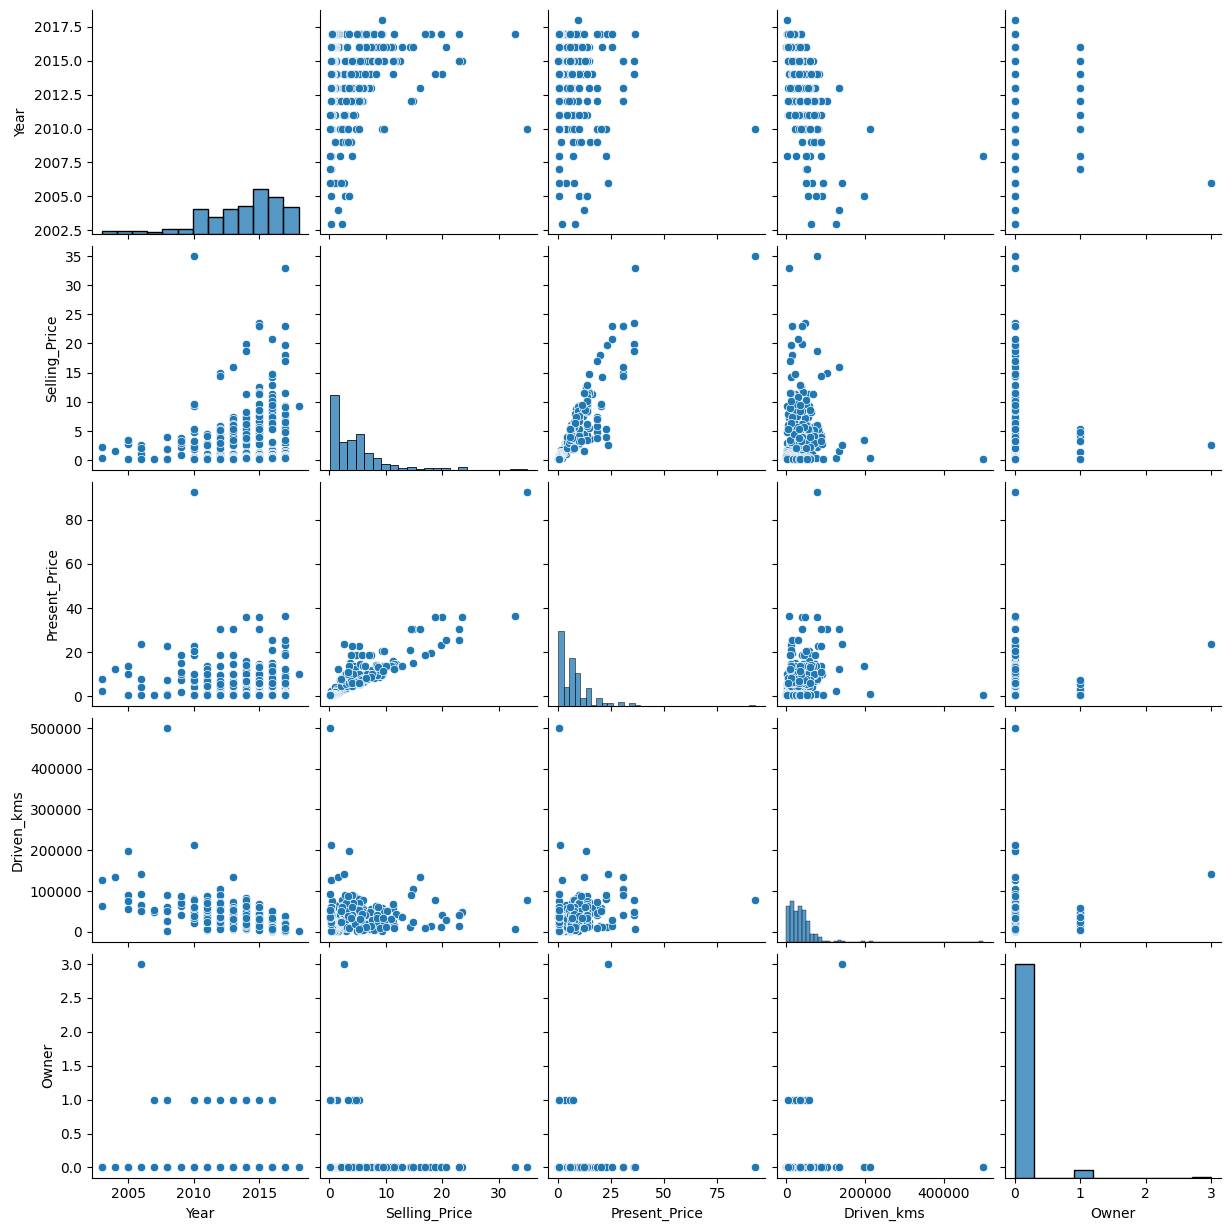

In [6]:
#Vizualisation of dataset
sns.pairplot(df)
plt.show()

In [7]:
#Preprocessing Data
#removing missing values
df.dropna(inplace=True)

# Encoding categorical variables
df = pd.get_dummies(df, drop_first=True)

df

,Year,Selling_Price,Present_Price,Driven_kms,Owner,Car_Name_Activa 3g,Car_Name_Activa 4g,Car_Name_Bajaj ct 100,Car_Name_Bajaj Avenger 150,Car_Name_Bajaj Avenger 150 street,...,Car_Name_swift,Car_Name_sx4,Car_Name_verna,Car_Name_vitara brezza,Car_Name_wagon r,Car_Name_xcent,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
1,2013,4.75,9.54,43000,0,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,True
2,2017,7.25,9.85,6900,0,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
3,2011,2.85,4.15,5200,0,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,True
4,2014,4.60,6.87,42450,0,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,0,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
297,2015,4.00,5.90,60000,0,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
298,2009,3.35,11.00,87934,0,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
299,2017,11.50,12.50,9000,0,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True


In [8]:
#Model building
# Split features and target variable
X = df.drop('Selling_Price', axis=1)
Y = df['Selling_Price']

# Split the dataset into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [16]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

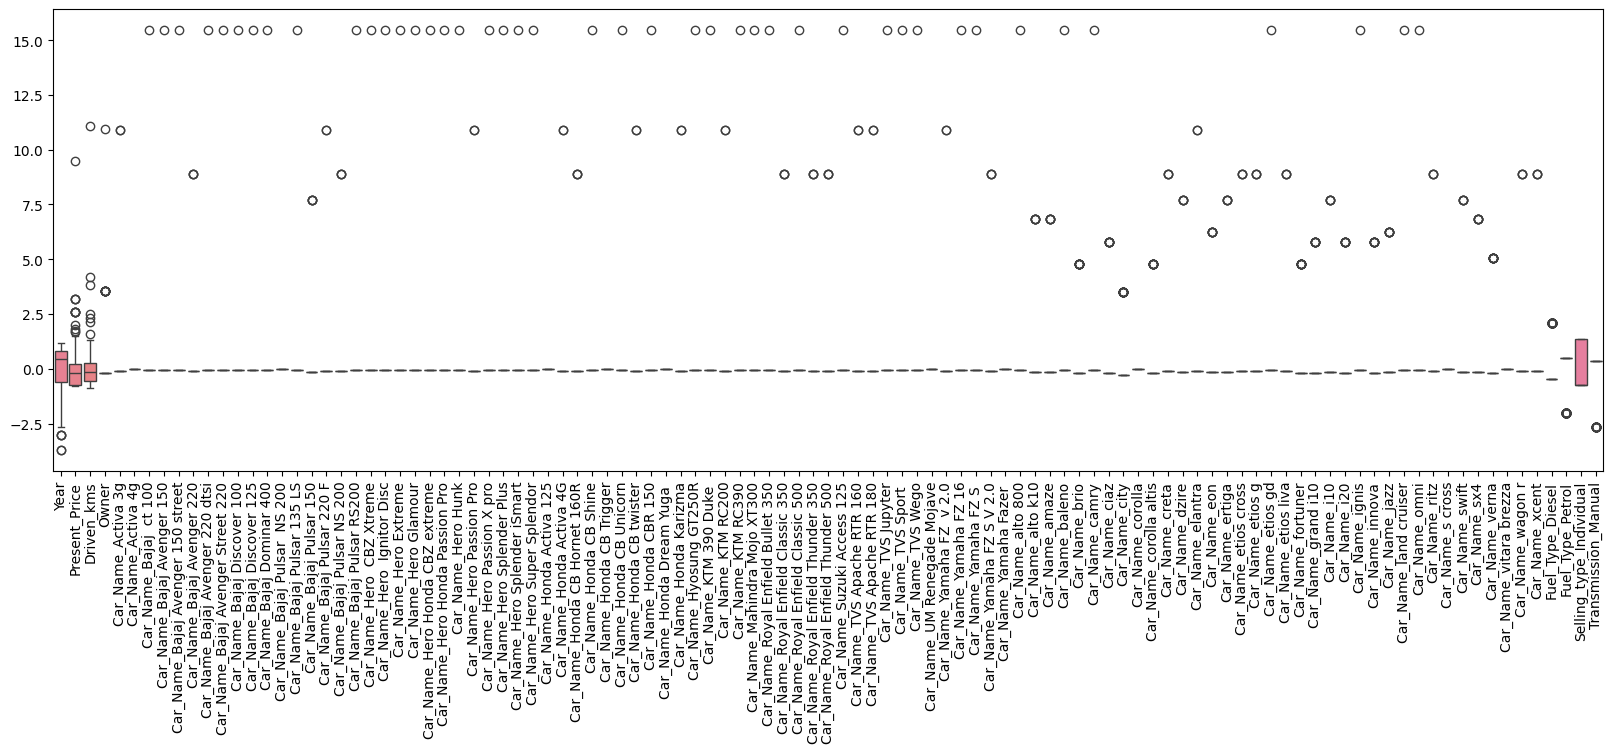

In [10]:
# Visualize scaled features
plt.figure(figsize=(20, 6))
sns.boxplot(data=pd.DataFrame(X_train_scaled, columns=X_train.columns))
plt.xticks(rotation=90)
plt.show()

In [11]:
#Model Training
# Initialize and train the model
model = LinearRegression()
model.fit(X_train_scaled, Y_train)

LinearRegression()

In [12]:
#Model Evaluation

# Predictions on training and testing set
train_preds = model.predict(X_train_scaled)
test_preds = model.predict(X_test_scaled)

# Evaluating the model
print('Train MSE:', mean_squared_error(Y_train, train_preds))
print('Test MSE:', mean_squared_error(Y_test, test_preds))
print('Train R^2:', r2_score(Y_train, train_preds))
print('Test R^2:', r2_score(Y_test, test_preds))

Train MSE: 1.3358034948418605
Test MSE: 9.2210903914507
Train R^2: 0.9494723068702063
Test R^2: 0.5997023481940056


In [13]:
import joblib 
joblib.dump(model, 'car_model.pkl')
print("Model saved as car_model.pkl")

Model saved as car_model.pkl


In [15]:
print(f'Trainning Accuracy: {model.score(X_train_scaled, Y_train)}')
print(f'Testing Accuracy: {model.score(X_test_scaled, Y_test)}')

Trainning Accuracy: 0.9494723068702063
Testing Accuracy: 0.5997023481940056


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
import joblib

# 1. Load Data
df = pd.read_csv("car data.csv")

# 2. Preprocessing
df.dropna(inplace=True)
df = pd.get_dummies(df, drop_first=True)

# 3. Feature/Target Split
X = df.drop('Selling_Price', axis=1)
Y = df['Selling_Price']

# 4. Train-Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# 5. Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Models to Compare
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Support Vector Regressor": SVR(),
    "XGBoost": XGBRegressor(objective='reg:squarederror', random_state=42)
}

# 7. Train & Evaluate Models
scores = {}

for name, model in models.items():
    model.fit(X_train_scaled, Y_train)
    y_pred = model.predict(X_test_scaled)
    score = r2_score(Y_test, y_pred)
    scores[name] = score
    print(f"{name} R2 Score: {score:.4f}")

# 8. Best Model Selection
best_model_name = max(scores, key=scores.get)
best_model = models[best_model_name]
print(f"\n✅ Best Model: {best_model_name} with R2 Score: {scores[best_model_name]:.4f}")

# 9. Save the Best Model
joblib.dump(best_model, 'best_car_price_model.pkl')
joblib.dump(scaler, 'scaler.pkl')  # Also save the scaler


Linear Regression R2 Score: 0.5997
Decision Tree R2 Score: 0.9508
Random Forest R2 Score: 0.9662
Support Vector Regressor R2 Score: 0.5328
XGBoost R2 Score: 0.9593

✅ Best Model: Random Forest with R2 Score: 0.9662


['scaler.pkl']

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor  # or any other model
import joblib

# Load data
df = pd.read_csv("car data.csv")
df.dropna(inplace=True)

X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

# Identify columns
numeric_cols = ['Year', 'Present_Price', 'Driven_kms', 'Owner']
categorical_cols = ['Fuel_Type', 'Selling_type', 'Transmission']

# Preprocessing pipelines
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Full pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Split and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

# Save the full pipeline (preprocessor + model)
joblib.dump(model, 'car_price_pipeline.pkl')


['car_price_pipeline.pkl']